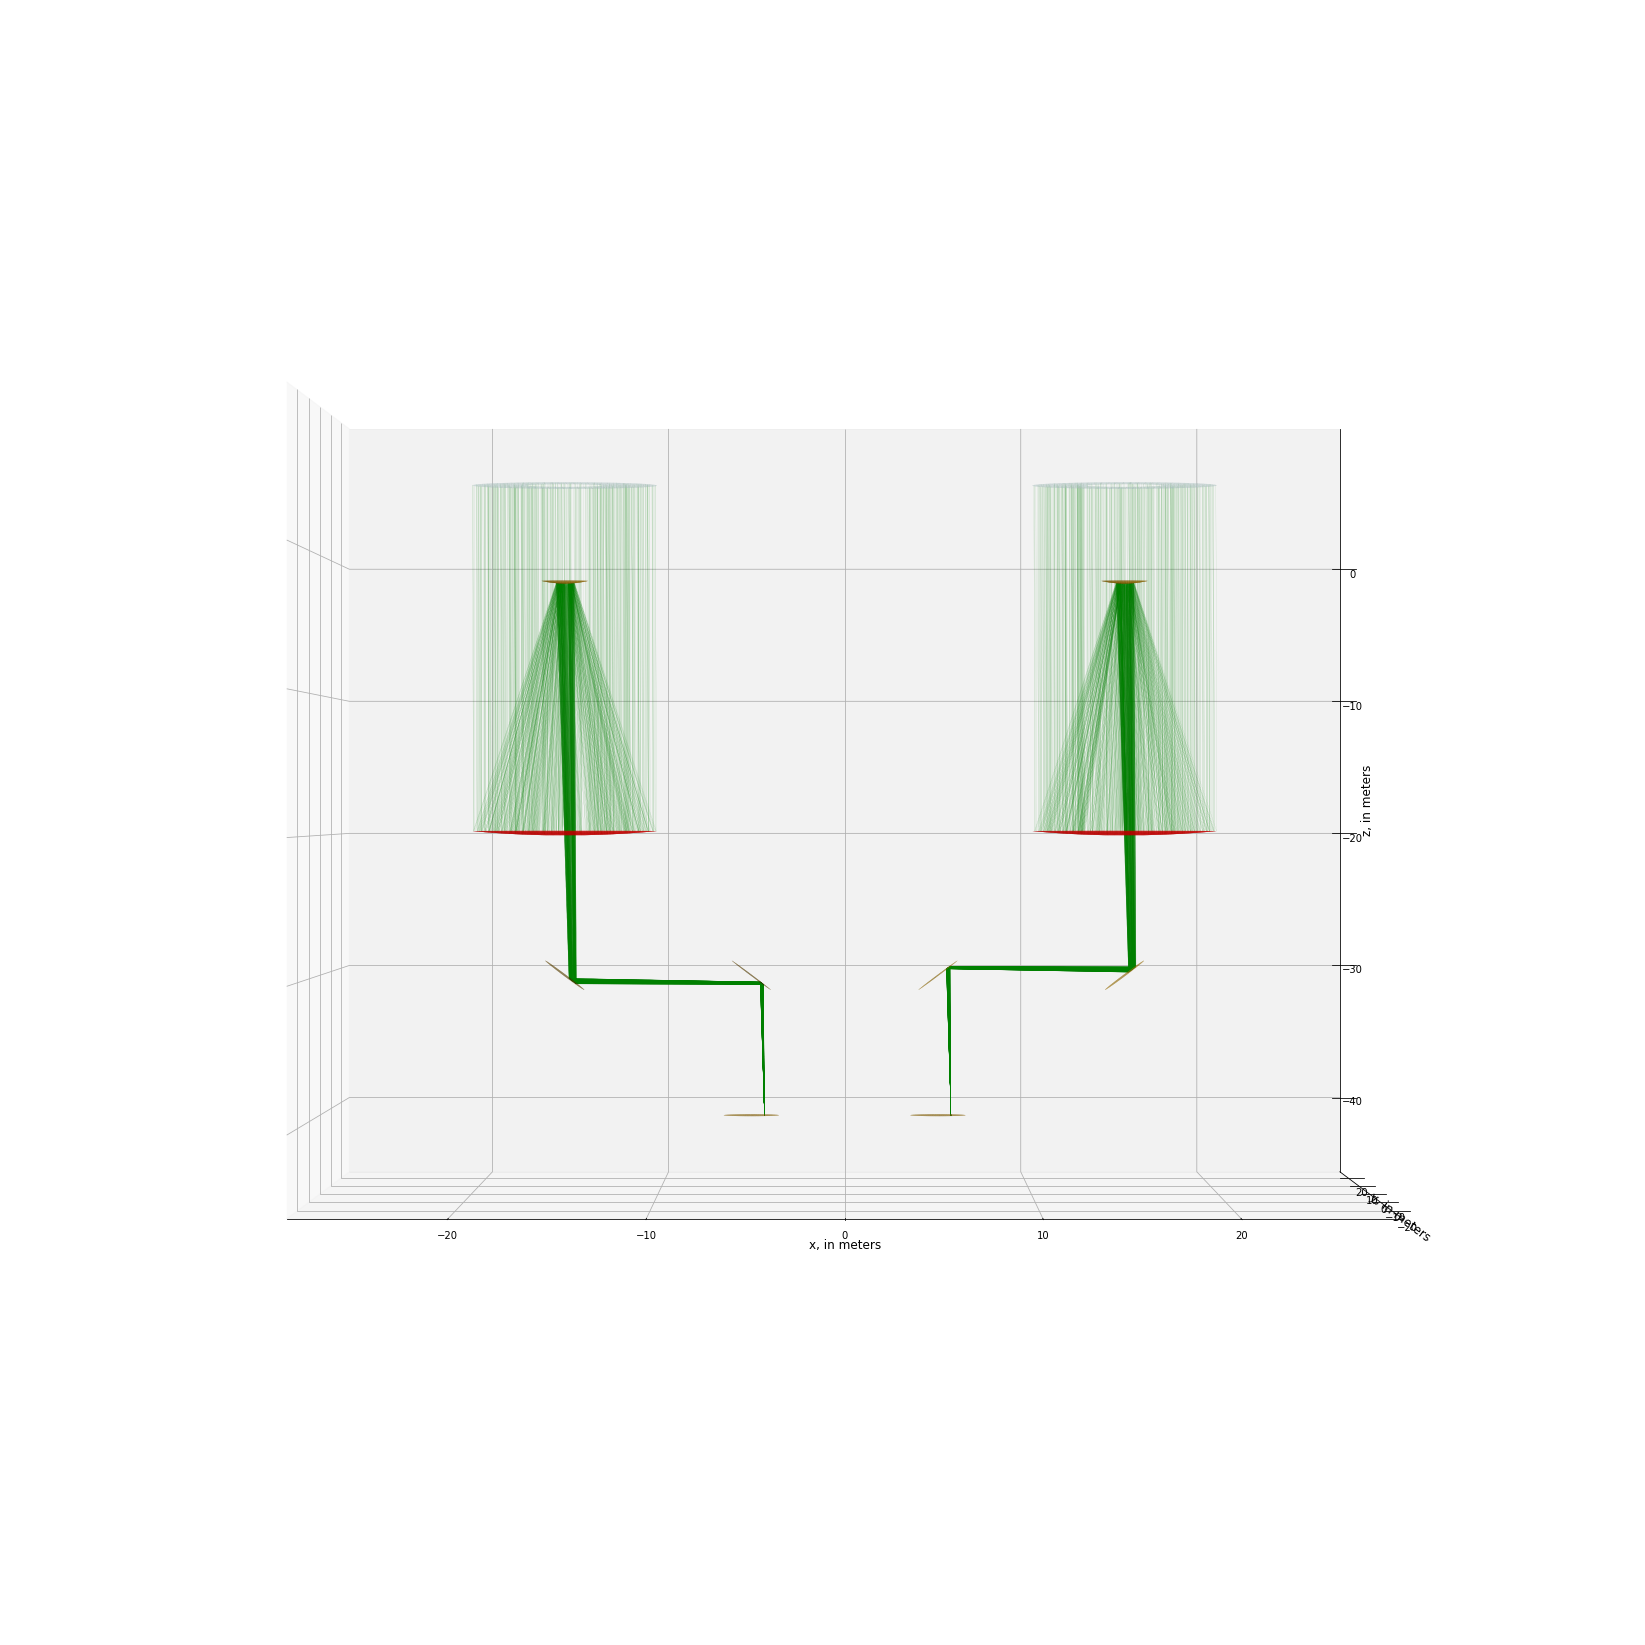

In [416]:
import pimms.optics as op
import copy
reload(op)
m0=op.SymmetricQuadricMirror(4., 10.,  f=np.inf, g=np.inf, b=(-1,-1),p=(0,0,5))
m1=op.SymmetricQuadricMirror(2., 10.,  f=20.,    g=np.inf, b=(1,1))
m2=op.SymmetricQuadricMirror(0.,  2.5, f=2.,     g=-48,    b=(1,1))
m3=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(0,0,-30), q=op.quat.from_angles(0., np.pi/4.))
m4=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(-10.,0,-30.), q=op.quat.from_angles(0., np.pi/4.))
d1=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(0,0), p=(-10,0,-40))
m0.is_virtual=True
m0.is_entrance=True
m1.is_primary=True
assembly=op.OpticalAssembly()
assembly.add_part(m0)
assembly.add_part(m1)
assembly.add_part(m2)
assembly.add_part(m3)
assembly.add_part(m4)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([15,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([-15,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(5./60.),np.inf))
p,q=s(assembly.get_entrance(), 500, 1e-3)
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(0, -90))

In [325]:
hash(m0)

345691113

In [326]:
hash(assembly.parts[0])

345691113

In [330]:
m0.name='entrance 0'

In [331]:
hash(m0)

345691113

In [342]:
seq[5][:500]

array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, -1,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4, -1,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [343]:
trace[5][:500]['position']

array([[ 5.49002774e+00,  1.26109437e-02, -2.95099825e+01],
       [ 5.45205356e+00,  1.65366220e-02, -2.95479567e+01],
       [ 5.51096703e+00,  2.29961176e-02, -2.94890431e+01],
       ...,
       [ 5.62653765e+00, -1.87041749e-02, -2.93734724e+01],
       [ 5.48498592e+00, -8.05364969e-02, -2.95150243e+01],
       [ 5.49706724e+00, -1.42759590e-02, -2.95029430e+01]])

In [345]:
p=assembly.parts[4]

In [350]:
p.intersect(trace[4][:500])

(array([[ 5.49002754e+00,  5.45205332e+00,  5.51096686e+00, ...,
          5.62653759e+00,  5.48498572e+00,  5.49706705e+00],
        [ 1.26109558e-02,  1.65366380e-02,  2.29961397e-02, ...,
         -1.87041927e-02, -8.05365745e-02, -1.42759728e-02],
        [-2.95099725e+01, -2.95479467e+01, -2.94890331e+01, ...,
         -2.93734624e+01, -2.95150143e+01, -2.95029330e+01]]),
 array([9.80671891, 9.77158428, 9.82616408, 9.83465262, 9.88993472,
        9.9397979 , 9.91235383, 9.90942725, 9.79404645, 9.80071401,
        9.82708334, 9.79472877, 9.82613264, 9.8791907 , 9.84804456,
        9.91319851,        inf, 9.91646829, 9.92587219, 9.89627523,
        9.92066963, 9.91836709, 9.94207599, 9.95410054, 9.78441271,
        9.76874642, 9.7819361 , 9.774766  , 9.81089517, 9.92686187,
        9.8244195 , 9.91904677, 9.90128416, 9.92544613, 9.9058098 ,
        9.89516667, 9.96159896, 9.90098527, 9.93306531, 9.9496772 ,
        9.83329931, 9.8772138 , 9.78318189, 9.8459697 , 9.9379727 ,
        

In [417]:
s=op.LightSource((np.pi,np.deg2rad(5./60.),np.inf))
p,q=s(assembly.get_entrance(), 10000, 1e-3)

In [418]:
timeit trace,seq=assembly.trace(q,steps=6)

1.06 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [392]:
r=np.random.rand(3,1000000)

In [396]:
timeit op.quat.rotate(m3.q,r)

13.1 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [397]:
import numexpr as ne

In [402]:
ne.evaluate('[rx**2., ry**2., rz**2.]',local_dict={'rx':r[0],'ry':r[1],'rz':r[2]})

TypeError: unsupported expression type: <class 'list'>

In [399]:
ne.evaluate?

Signature:
ne.evaluate(
    ex,
    local_dict=None,
    global_dict=None,
    out=None,
    order='K',
    casting='safe',
    **kwargs,
)
Docstring:
Evaluate a simple array expression element-wise, using the new iterator.

ex is a string forming an expression, like "2*a+3*b". The values for "a"
and "b" will by default be taken from the calling function's frame
(through use of sys._getframe()). Alternatively, they can be specifed
using the 'local_dict' or 'global_dict' arguments.

Parameters
----------

local_dict : dictionary, optional
    A dictionary that replaces the local operands in current frame.

global_dict : dictionary, optional
    A dictionary that replaces the global operands in current frame.

out : NumPy array, optional
    An existing array where the outcome is going to be stored.  Care is
    required so that this array has the same shape and type than the
    actual outcome of the computation.  Useful for avoiding unnecessary
    new array allocations.

order : {'C',